# Task Description
In this task you will be working on the following dataset:

kaggle.com

The objective of this task is to perform linear regression on the dataset and find out the best r2 score.

The main thing to consider is that the dataset is essentially non-linear in nature, means you will have to apply Polynomial Regression and find out the best value for the degree parameter.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Position_Salaries.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Plotting the Salary vs Level

Text(0,0.5,'Salary')

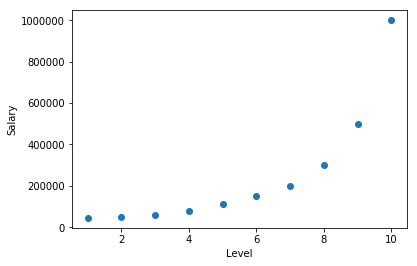

In [4]:
plt.scatter(data.Level,data.Salary)
plt.xlabel("Level")
plt.ylabel("Salary")

# Splitting the data in X(train,test),y(train,test)

In [5]:
X=data.iloc[:,1:2].values

In [6]:
X.shape

(10, 1)

In [7]:
y=data.iloc[:,-1].values

In [8]:
y.shape

(10,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape

(8, 1)

In [25]:
y_train.shape

(8,)

# Applying Linear Regression on the non-linear data

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(y_test,y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score -5.372510118754106
MSE 151462.9869886197


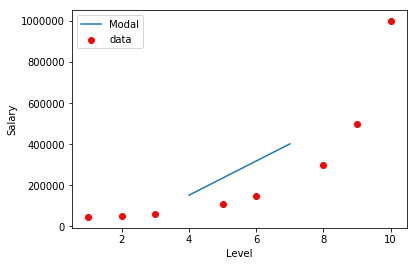

In [30]:
plt.plot(X_test,lr.predict(X_test),label="Modal")
plt.scatter(X_train,y_train,label="data", color="r")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Here we are getting the value of R2 Score in negative so our Algorithm cannot work properly for this datasets

# Applying Polynomial Regression on the non-linear data

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=6)
X_poly=poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(8, 7)


array([[1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03,
        5.90490e+04, 5.31441e+05],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04,
        1.00000e+05, 1.00000e+06],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04]])

In [32]:
lr1=LinearRegression()
lr1.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
X_poly1=poly.fit_transform(X_test)

In [34]:
y_pred1=lr1.predict(X_poly1)

In [35]:
print("R2 Score:",r2_score(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.989851771151229
RMSE: 151462.9869886197


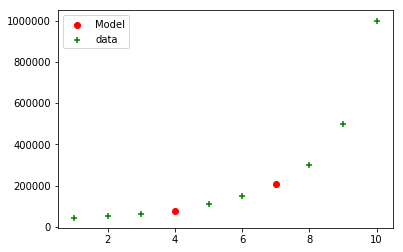

In [36]:
plt.scatter(X_test,y_pred1, label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
plt.legend()
plt.show()

# Here we are getting the value of R2 Score of 95% so our Algorithm is working properly for this dataset

# Determining the best value for the Hyper Parameter "Degree"

In [37]:
def polynomialRegression(X,y,k=6):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    poly = PolynomialFeatures(degree=k)
    X_poly = poly.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_poly,y_train)
    
    X_test_poly =poly.fit_transform(X_test)
    y_pred=lr.predict(X_test_poly)
    
    training_score = r2_score(y_train, lr.predict(X_poly))
    test_score = r2_score(y_test,y_pred)
  
    return training_score, test_score

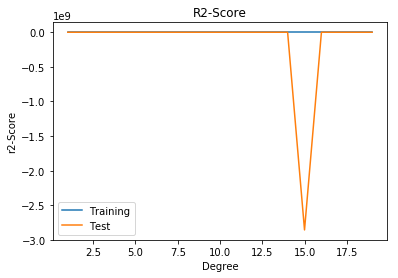

In [38]:
train=[]
test=[]
for i in range(1,20):
    r2train,r2test=polynomialRegression(X,y,k=i)
    train.append(r2train)
    test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
plt.title("R2-Score");
plt.show()

# From the above graph it is clear that the difference is low between training error and testing error at the point 6 so we can choose the value of degree as 6